In [1]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
import networkx as nx

In [4]:
from nltk.tokenize.punkt import PunktSentenceTokenizer

In [5]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [6]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)
   
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [7]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()

    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [9]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: AP880913-0129.txt
You have asked for the document AP880913-0129.txt
1
<class 'str'>
The length of the file is: 2735


In [10]:
sentences_list = tokenize(document)
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 360
The size of the item 0 in Bytes is: 284


In [11]:
print(type(sentences_list))

<class 'list'>


In [12]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 28


In [13]:
for i in sentences_list:
    print(i)

   Coast Guard and Navy aircraft and vessels today searched for a crewman missing from an F-14 jet fighter that plunged into the Atlantic Ocean off North Carolina while practicing combat maneuvers, killing his crewmate, officials said.
Six people were injured in another F-14 crash Monday after two Navy aviators bailed out of their jet over an airfield in the San Diego suburb of El Cajon, sending it smashing into a hangar.
And a pilot in Utah escaped injury today in a third military training flight in two days.
The crash off Hatteras, N.C., occurred Monday afternoon 22 miles east of Oregon Inlet, the Navy said.
A fishing boat picked up a crewman, who was pronounced dead.
The identity of the dead aviator and his missing crewmate were not released pending notification of relatives.
Five people, including the two Navy fliers, remained hospitalized today following the crash Monday morning in El Cajon 15 miles east of San Diego.
The $35 million jet crashed upside down into hangars at Gillesp

In [14]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [15]:
cv_demo = CountVectorizer()
text_demo = ["Goutham is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 1 0]]
Feature list: ['am', 'are', 'bad', 'good', 'goutham', 'is', 'not', 'you']


In [16]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <28x239 sparse matrix of type '<class 'numpy.int64'>'
	with 409 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['05', '14', '143', '15', '16a', '22', '25', '35', '388th', 'about', 'accident', 'after', 'afternoon', 'air', 'aircraft', 'airfield', 'airspace', 'an', 'and', 'another', 'are', 'area', 'assigned', 'at', 'atlantic', 'attached', 'authorities', 'aviator', 'aviators', 'bailed', 'bailing', 'ballantyne', 'base', 'be', 'beach', 'before', 'blaze', 'boat', 'but', 'by', 'cajon', 'capt', 'carolina', 'cause', 'close', 'cmdr', 'coast', 'combat', 'commanding', 'crash', 'crashed', 'crewman', 'crewmate', 'days', 'dead', 'declined', 'destroyed', 'determined', 'diego', 'dogfights', 'doing', 'down', 'east', 'el', 'elementary', 'engaged', 'engine', 'escaped', 'exploded', 'extension', 'field', 'fighter', 'fishing', 'five', 'fleet', 'fliers', 'flight

In [17]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.15743796 0.         ... 0.         0.         0.        ]
 [0.         0.16329252 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.24448886 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [18]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T
# plt.spy(res_graph)

<bound method _cs_matrix.toarray of <239x28 sparse matrix of type '<class 'numpy.float64'>'
	with 409 stored elements in Compressed Sparse Column format>>


Number of edges 258
Number of vertices 28


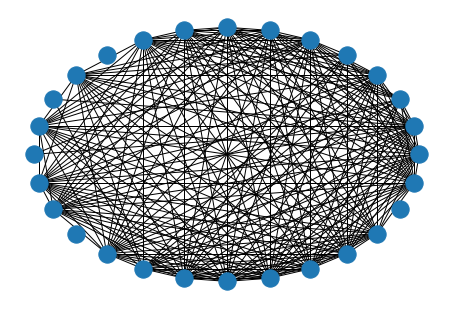

The memory used by the graph in Bytes is: 56


In [19]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [20]:
ranks = nx.pagerank(nx_graph)
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 1184
0 0.03953780214630422
1 0.04652875337269738
2 0.0337197583076115
3 0.037883776290645155
4 0.025790516604439668
5 0.03794915760968788
6 0.03952473055906923
7 0.032162765049711016
8 0.03271766824523926
9 0.04142937395839473
10 0.03571428571428571
11 0.02967725369232072
12 0.02654511441169499
13 0.03414313144056265
14 0.027727579887671987
15 0.030576719600095725
16 0.032637894451595435
17 0.03571428571428571
18 0.04789935718260768
19 0.0357745923048829
20 0.043860562900380456
21 0.03240051695582128
22 0.03524994556421329
23 0.04323682243205125
24 0.03614684987581029
25 0.03292917713593752
26 0.03571428571428571
27 0.03680732287769669


In [21]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [22]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [23]:
print(rank_max)
print(rank_min)

0.04789935718260768
0.025790516604439668


In [24]:
temp_array = []
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

28


In [25]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [26]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [27]:
model = sentence_list

In [28]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
f = open('final3.txt', 'a+')
f.write('\n')
f.write(summary)
f.close

Mike John, a spokesman for the Navy's Atlantic Fleet air force in Norfolk, Va., said the plane was engaged in mock dogfights with another F-14 and an A-4 jet in restricted military airspace off the North Carolina coast. Six people were injured in another F-14 crash Monday after two Navy aviators bailed out of their jet over an airfield in the San Diego suburb of El Cajon, sending it smashing into a hangar. The cause of the crash was not determined, officials said. In northern Utah today, an F-16A jet fighter crashed west of Hill Air Force Base after the pilot bailed out, a base spokeswoman said. Authorities said the two crewman tried to guide the jet to the runway at Gillespie Field before bailing out.


<function TextIOWrapper.close()>

In [29]:
for lines in sentence_list:
    print(lines)

Mike John, a spokesman for the Navy's Atlantic Fleet air force in Norfolk, Va., said the plane was engaged in mock dogfights with another F-14 and an A-4 jet in restricted military airspace off the North Carolina coast.
Six people were injured in another F-14 crash Monday after two Navy aviators bailed out of their jet over an airfield in the San Diego suburb of El Cajon, sending it smashing into a hangar.
The cause of the crash was not determined, officials said.
In northern Utah today, an F-16A jet fighter crashed west of Hill Air Force Base after the pilot bailed out, a base spokeswoman said.
Authorities said the two crewman tried to guide the jet to the runway at Gillespie Field before bailing out.


In [30]:
# -*- coding: utf-8 -*-
from __future__ import print_function
from pythonrouge.pythonrouge import Pythonrouge
from pprint import pprint

if __name__ == '__main__':
    summary = './sample/summary/'
    reference = './sample/reference/'
    print('evaluate sumamry & reference in these dirs')
    print('summary:\t{}\nreference:\t{}'.format(summary, reference))
    rouge = Pythonrouge(summary_file_exist=True,
                        peer_path=summary, model_path=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=False, f_measure_only=False,
                        stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall & f-measure with confidence interval')
    pprint(score)
    print('Evaluate ROUGE based on sentecnce lists')
    
    summary = [["An officer of the Central Reserve Police Force (CRPF) officer was killed in a gunfight",
                "with the Maoists in a dense forest in the insurgency-hit Sukma district of Chhattisgarh",
                "The gunfight took place last night in Kistaram police station area."],
               ["when a team of CRPF's 212th battalion was out on a search-cum-area domination operation",
                "Deputy Inspector General of Police",
                "Police (South Bastar Range) Sundarraj P told PTI"]]
    reference = [
                 [["An officer of the Central Reserve Police Force (CRPF) officer was killed in a gunfight "],
                  ["with the Maoists in a dense forest in the insurgency-hit Sukma district of Chhattisgarh"],
                  ["The gunfight took place last night in Kistaram police station area when a team of CRPF's",
                  "12th battalion was out on a search-cum-area domination operation,"]],
                 [["Deputy Inspector General of Police (South Bastar Range)",
                   " Sundarraj P told PTI."],
                  ["The deceased was a native of Madhya Pradesh.",
                   "Security forces have launched a combing operation in the area",
                   "ocated around 500 km away from the state capital Raipur"],
                  ]
                  ]
    rouge = Pythonrouge(summary_file_exist=False,
                        summary=summary, reference=reference,
                        n_gram=2, ROUGE_SU4=True, ROUGE_L=False,
                        recall_only=True, stemming=True, stopwords=True,
                        word_level=True, length_limit=True, length=50,
                        use_cf=True, cf=95, scoring_formula='average',
                        resampling=True, samples=1000, favor=True, p=0.5)
    score = rouge.calc_score()
    print('ROUGE-N(1-2) & SU4 recall only with confidence interval')
    pprint(score)

evaluate sumamry & reference in these dirs
summary:	./sample/summary/
reference:	./sample/reference/
ROUGE-N(1-2) & SU4 recall & f-measure with confidence interval
{}
Evaluate ROUGE based on sentecnce lists
ROUGE-N(1-2) & SU4 recall only with confidence interval
{'ROUGE-1': 0.61313,
 'ROUGE-1-cf95': (0.46154, 0.76471),
 'ROUGE-2': 0.54234,
 'ROUGE-2-cf95': (0.375, 0.70968),
 'ROUGE-SU4': 0.50672,
 'ROUGE-SU4-cf95': (0.34677, 0.66667)}
